In [1]:
%load_ext autoreload
%autoreload 2
from wind.odecache import MultiODECache,ODECache
import matplotlib.pyplot as plt
%matplotlib inline
from abg_python.all_utils import *
from distinct_colours import get_distinct

/Users/agurvich/anaconda/envs/ytdev/lib/python3.6/site-packages/matplotlib/style/core.py:167: UserWarning: In /Users/agurvich/.matplotlib/stylelib/ABG_black_presentation.mplstyle: Duplicate key in file "/Users/agurvich/.matplotlib/stylelib/ABG_black_presentation.mplstyle", line #9
  styles = read_style_directory(stylelib_path)


In [142]:
savefig = 1
if savefig:
    plt.style.use('ABG_black_presentation')

In [181]:
ntiles =[5 ,10, 15, 20, 25, 30, 40, 45, 50, 100,200,500]
names = ['Katz96_fixed_%d_1'%ntile for ntile in ntiles]
multi_odes = MultiODECache(names,'../../nsteps_data')
multi_odes.fixed_steps = multi_odes.params[:,-1].astype(int)

../../nsteps_data/Katz96_fixed_5_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_10_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_15_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_20_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_25_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_30_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_40_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_45_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_50_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_100_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_200_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
../../nsteps_data/Katz96_fixed_500_1 Katz96_1.hdf5
['RK2', 'SIE'] solvers used
[ODECache Katz96_fixed_5_1 - RK2 - SIE, ODECache Katz96_fixed_

In [178]:

ntiles =[1,2,3,4,5,6,7,8,9,10,50,100]

names = ['NR_test_fixed_%d_1'%ntile for ntile in ntiles]
multi_odes = MultiODECache(names,'../../nsteps_data')
multi_odes.fixed_steps = multi_odes.params[:,-1].astype(int)

../../nsteps_data/NR_test_fixed_1_1 NR_test_fixed_1_1.hdf5
No memory profiling information for ODECache NR_test_fixed_1_1 - SIE SIE
['SIE'] solvers used
../../nsteps_data/NR_test_fixed_2_1 NR_test_fixed_2_1.hdf5
['SIE'] solvers used
../../nsteps_data/NR_test_fixed_3_1 NR_test_fixed_3_1.hdf5
No memory profiling information for ODECache NR_test_fixed_3_1 - SIE SIE
['SIE'] solvers used
../../nsteps_data/NR_test_fixed_4_1 NR_test_fixed_4_1.hdf5
No memory profiling information for ODECache NR_test_fixed_4_1 - SIE SIE
['SIE'] solvers used
../../nsteps_data/NR_test_fixed_5_1 NR_test_fixed_5_1.hdf5
No memory profiling information for ODECache NR_test_fixed_5_1 - SIE SIE
['SIE'] solvers used
../../nsteps_data/NR_test_fixed_6_1 NR_test_fixed_6_1.hdf5
No memory profiling information for ODECache NR_test_fixed_6_1 - SIE SIE
['SIE'] solvers used
../../nsteps_data/NR_test_fixed_7_1 NR_test_fixed_7_1.hdf5
No memory profiling information for ODECache NR_test_fixed_7_1 - SIE SIE
['SIE'] solvers used
..

/Users/agurvich/anaconda/envs/ytdev/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [186]:
def plot_something_vs_ntile(multi_odes,ode_cache_fn,xs=None,ax = None):
    colors = get_distinct(3)
    #colors = colors[::2]
    if ax is None:
        ## create a new figure
        fig = plt.figure()
        ax = plt.gca()
    else:
        fig = ax.get_figure()
    ## loop through each solver
    xs = (np.array([ode_cache.Nequations_per_system for ode_cache in multi_odes.ode_caches])
          if xs is None else xs)
    for solver_i,solver in enumerate(['SIE','RK2']):
        ## generate y values
        ys = []
        for ode_cache in multi_odes.ode_caches:
            try:
                ys+=[ode_cache_fn(ode_cache,solver)]
            except KeyError:
                continue
        
        a,b=fitAXb(xs,ys,None)
        test_xs = np.linspace(xs.min(),xs.max(),2)
        ax.plot(test_xs,a*test_xs+b,lw=3,ls='--',c=colors[solver_i])
        ax.plot(xs[:len(ys)],ys,'.',markersize=16,lw=3,label=solver,c=colors[solver_i])
        text_x = np.sum(xs[-2:])/2
        ynorm = ys[-1]/3
        xnorm = xs[-1]/500
        angle = np.arctan2(ynorm,xnorm)*180/np.pi*0.8
        order_mag = np.floor(np.log10(a))
        ax.text(
            text_x,
            (a*text_x+b)-(solver=='SIE')*0.4,
            #r'$%.1f \times 10^{%d}$ s/step'%(a/10**order_mag,order_mag),
            r'%d ms %.1f ms/step'%(b*1e3,a*1e3),
            va='bottom',ha='center',
            rotation = angle,
            color=colors[solver_i],
            weight='bold')
    return fig,ax

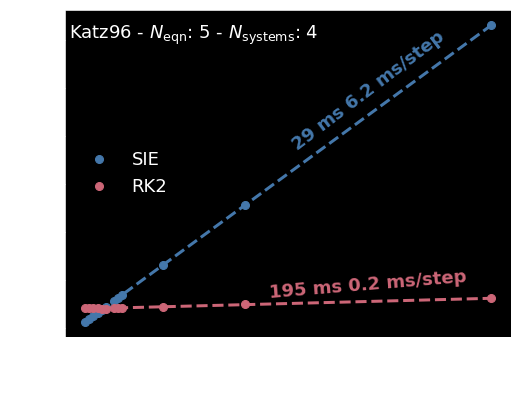

In [187]:
fig,ax = plot_something_vs_ntile(multi_odes,
    lambda ode_cache,solver: np.sum(ode_cache.walltimess[solver]),
    xs=multi_odes.fixed_steps)


nameAxes(
        ax,None,'$N_\mathrm{fixed steps}$', 'time to solution (s)',
        logflag=(0,0),
        supertitle="%s - $N_\mathrm{eqn}$: %d - $N_\mathrm{systems}$: %d"%(
            multi_odes.system_name,
            multi_odes[0].Nequations_per_system,
            multi_odes[0].Nsystems),
        make_legend=True,
        loc=5)
fig.set_size_inches(8,6)
if savefig:
    fig.savefig('%s_tts_vs_fixed_steps.pdf'%multi_odes.system_name,facecolor='k')

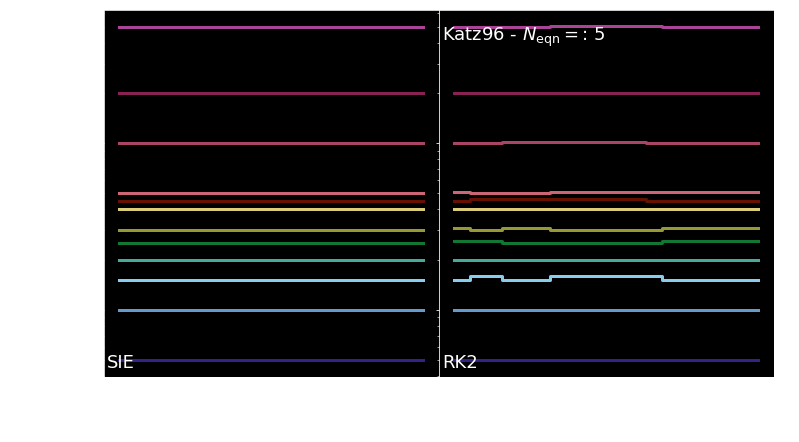

In [163]:
def plot_all_nsteps_histogram(multi_odes):
    fig,axs = plt.subplots(ncols=2,nrows=1,sharex=True,sharey=True)
    axs = axs.flatten()
    for ax,solver in zip(axs,['SIE','RK2']):
        for ode_cache in multi_odes:
            plot_nsteps_histogram(ax,ode_cache,solver)
    return fig,axs

def plot_nsteps_histogram(ax,ode_cache,solver):
    ## get enough colors for each ode system
    xs = ode_cache.timess[solver]
    ys = ode_cache.nstepss[solver]/ode_cache.Nsystems
    if solver == 'SIE':
        ys*=ode_cache.Nsystems
    ax.step(
        xs[1:],ys,
        lw=3,
        label=ode_cache.name,
        where='post',
        color=ode_cache.color)
    
    nameAxes(
        ax,None,
        '$t_\mathrm{ode}$ (yrs)',
        '$N_\mathrm{steps}$',
        logflag=(0,1))
    return ax

fig,axs = plot_all_nsteps_histogram(multi_odes)

nameAxes(axs[0],None,None,None,
        subtitle='SIE')

nameAxes(axs[1],None,None,None,
    subtitle='RK2',
    supertitle="%s - $N_\mathrm{eqn}=$: %d"%(
        multi_odes.system_name,
        multi_odes[0].Nequations_per_system),
    make_legend=False,
    loc=6)

bufferAxesLabels(axs,1,2,
    ylabels=True,share_xlabel='$t_\mathrm{ode}$ (yrs)',
    xlabels=True,share_ylabel= '$N_\mathrm{steps}$/$N_\mathrm{systems}$',
    label_offset=0.025)
plt.subplots_adjust(hspace=0,wspace=0)
fig.set_size_inches(12,6.75)
if savefig:
    fig.savefig("%s_nsteps_per_fixedsteps.pdf"%multi_odes.system_name,facecolor='k')

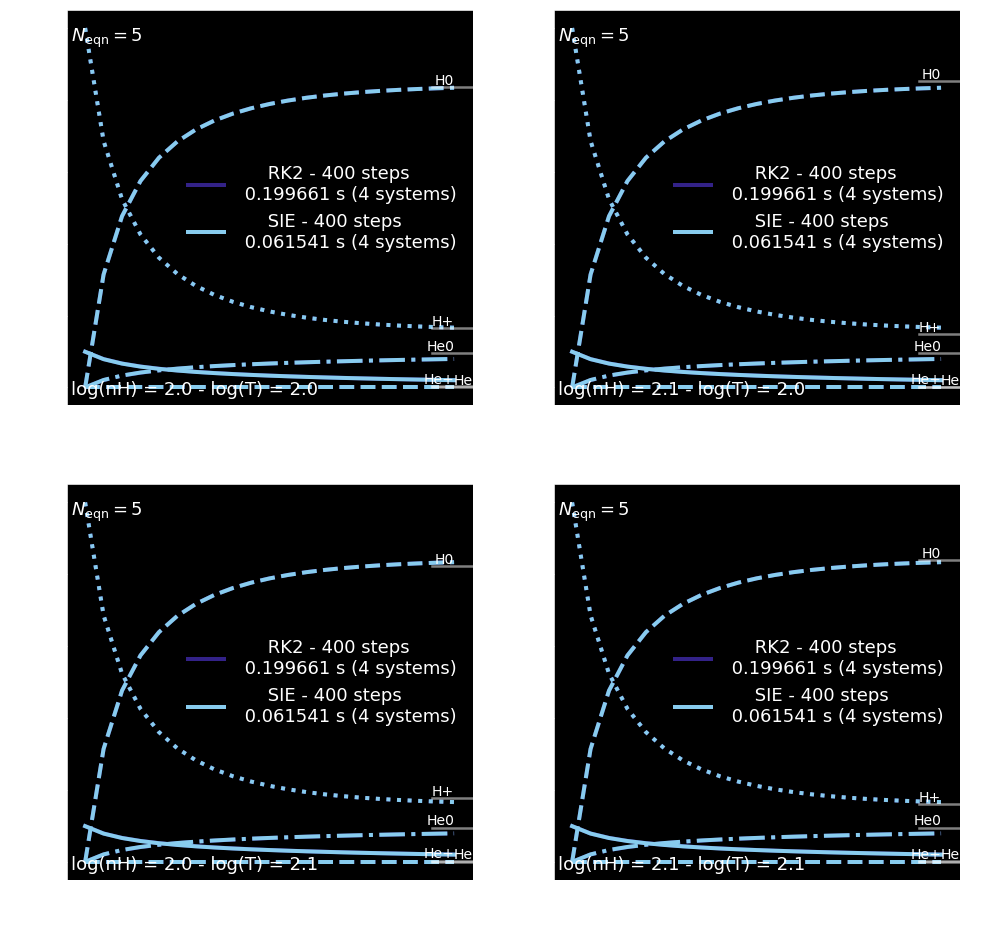

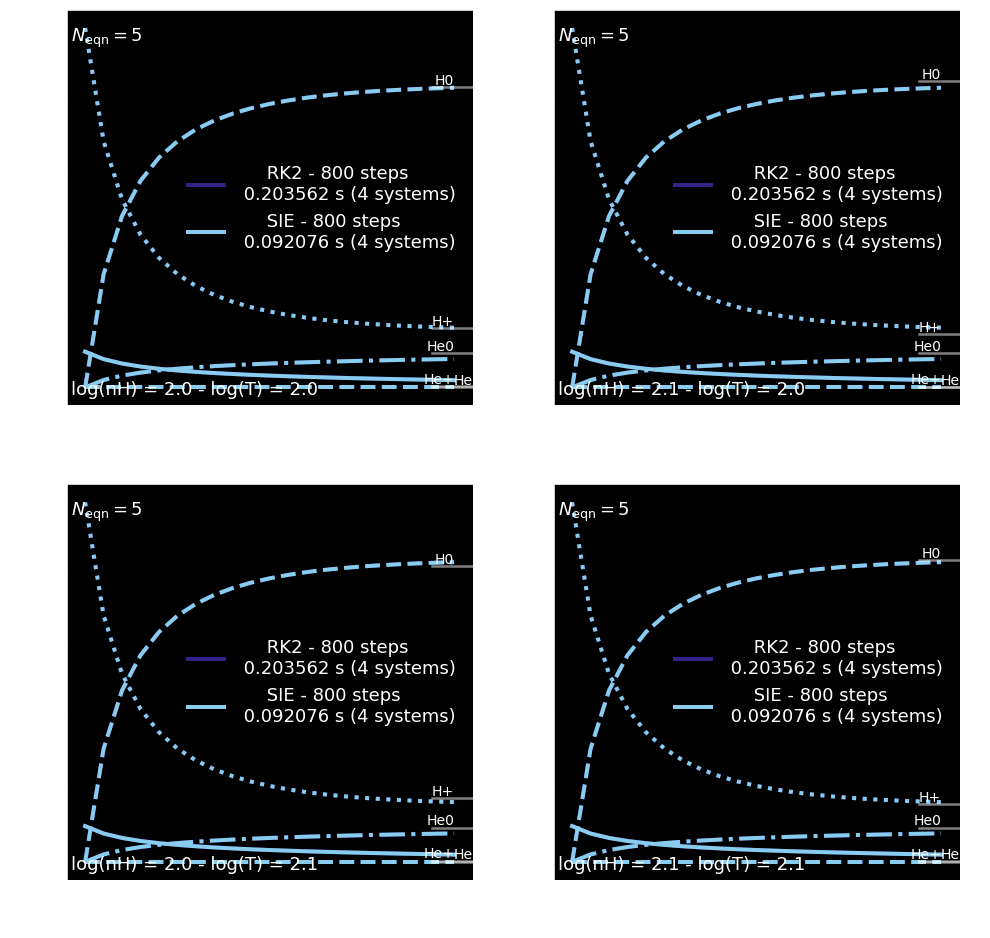

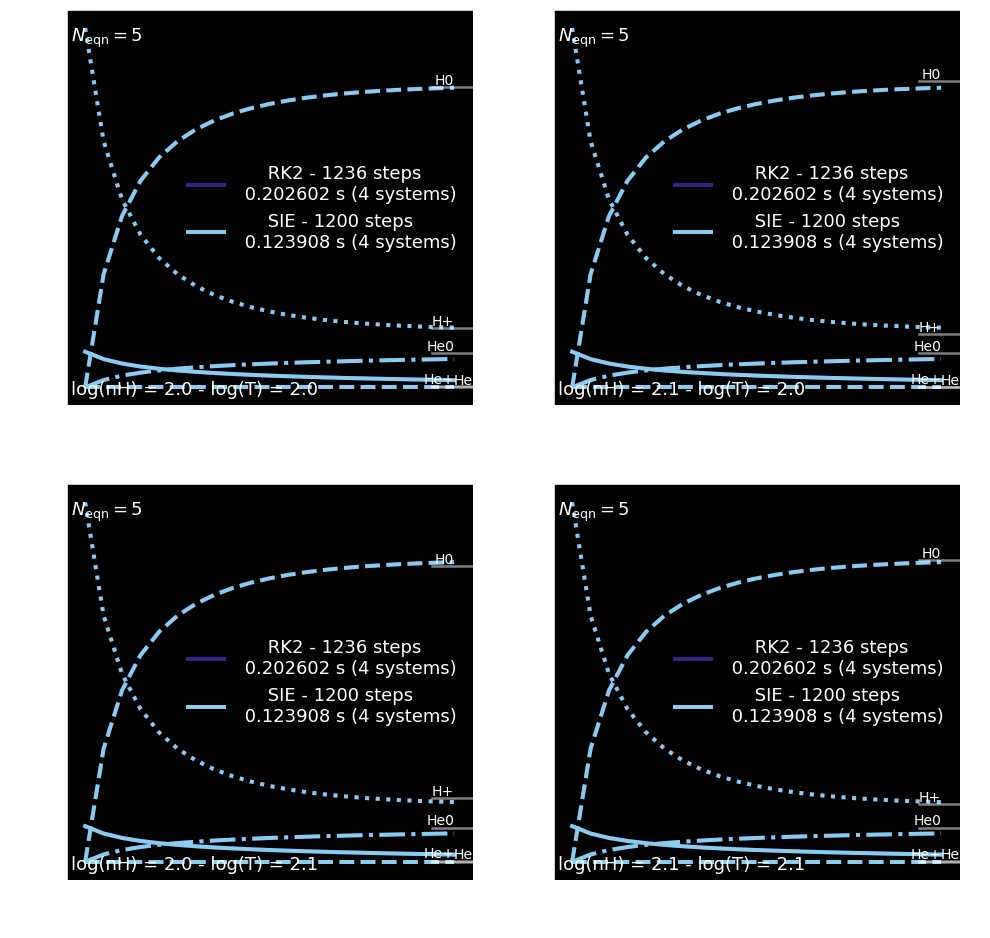

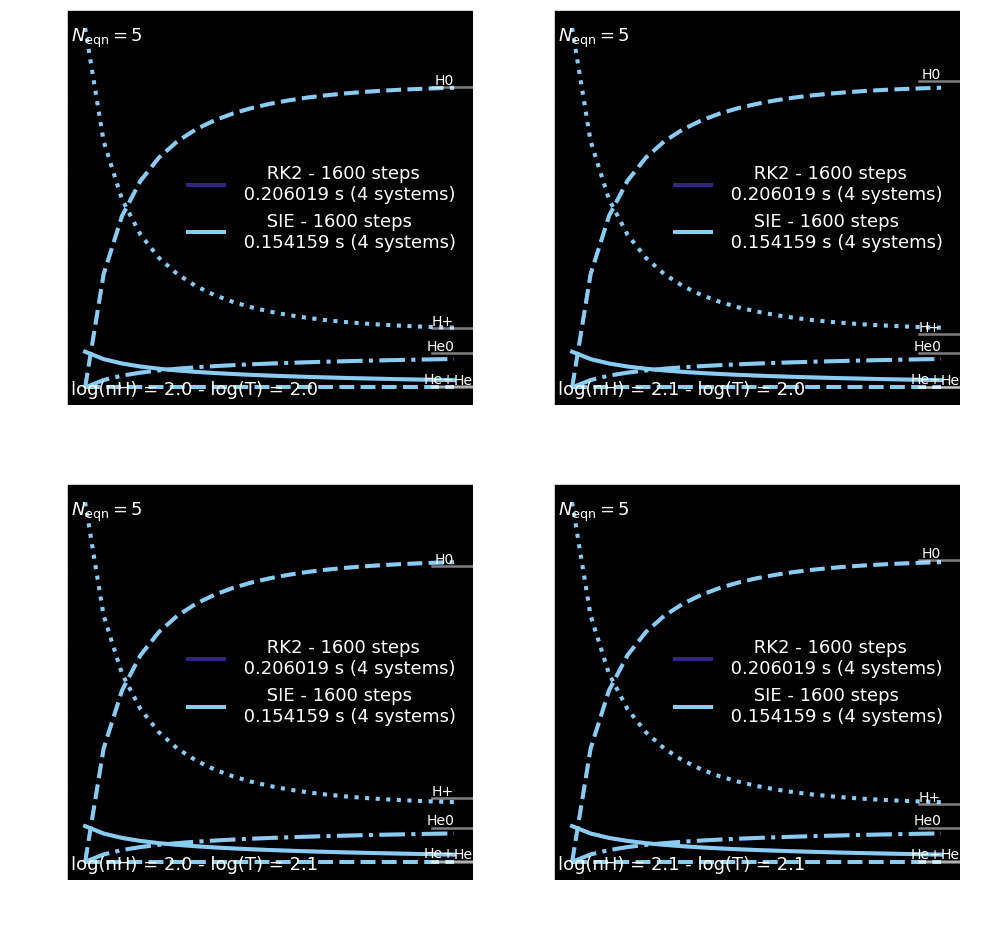

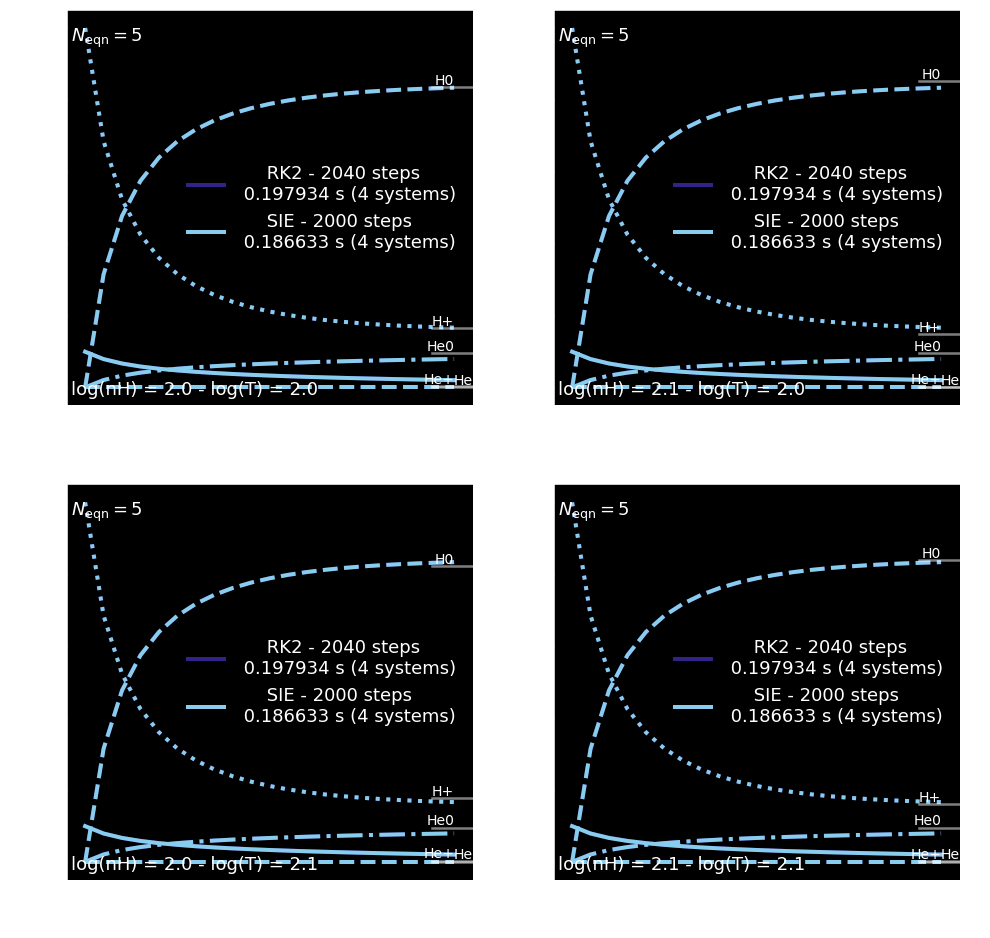

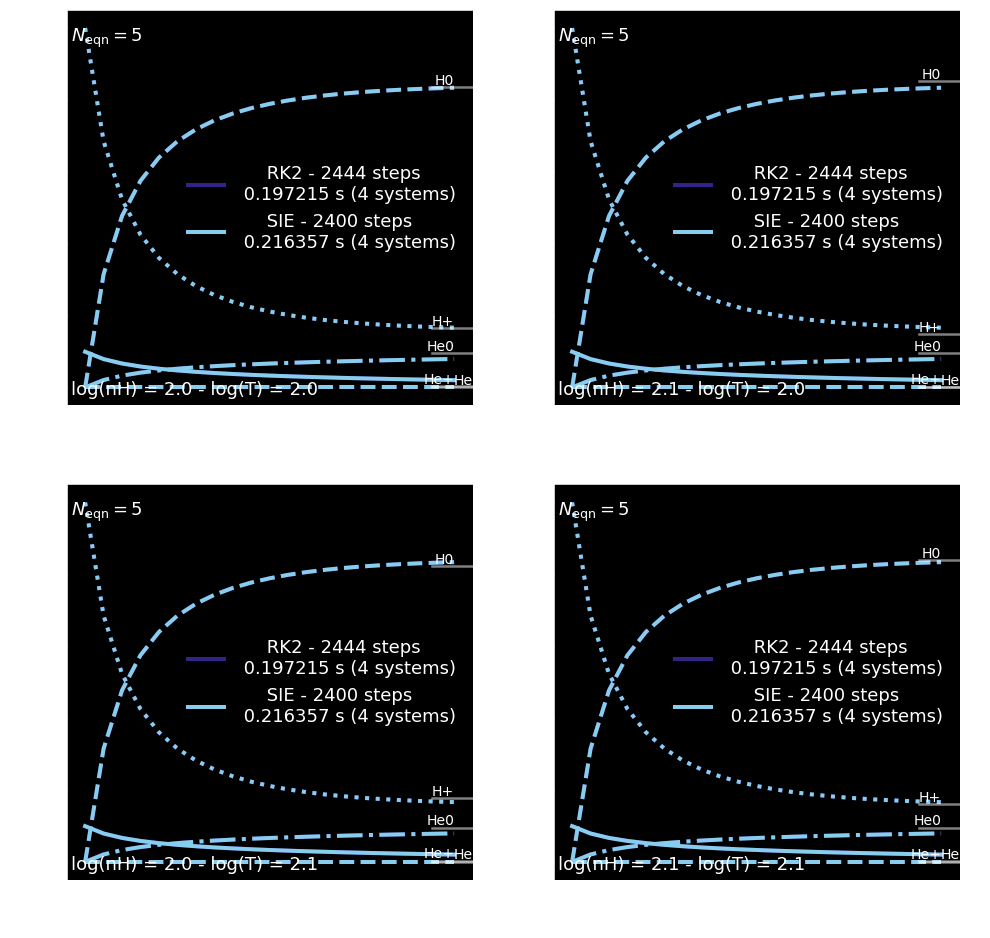

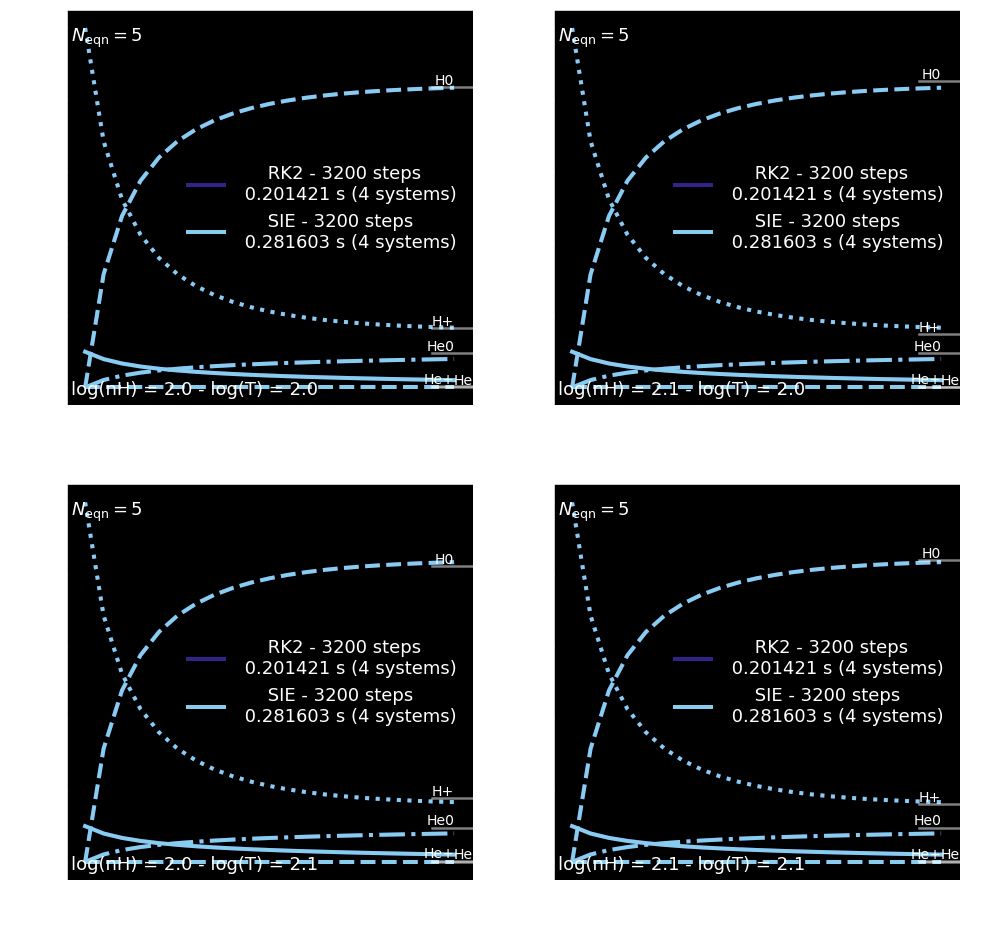

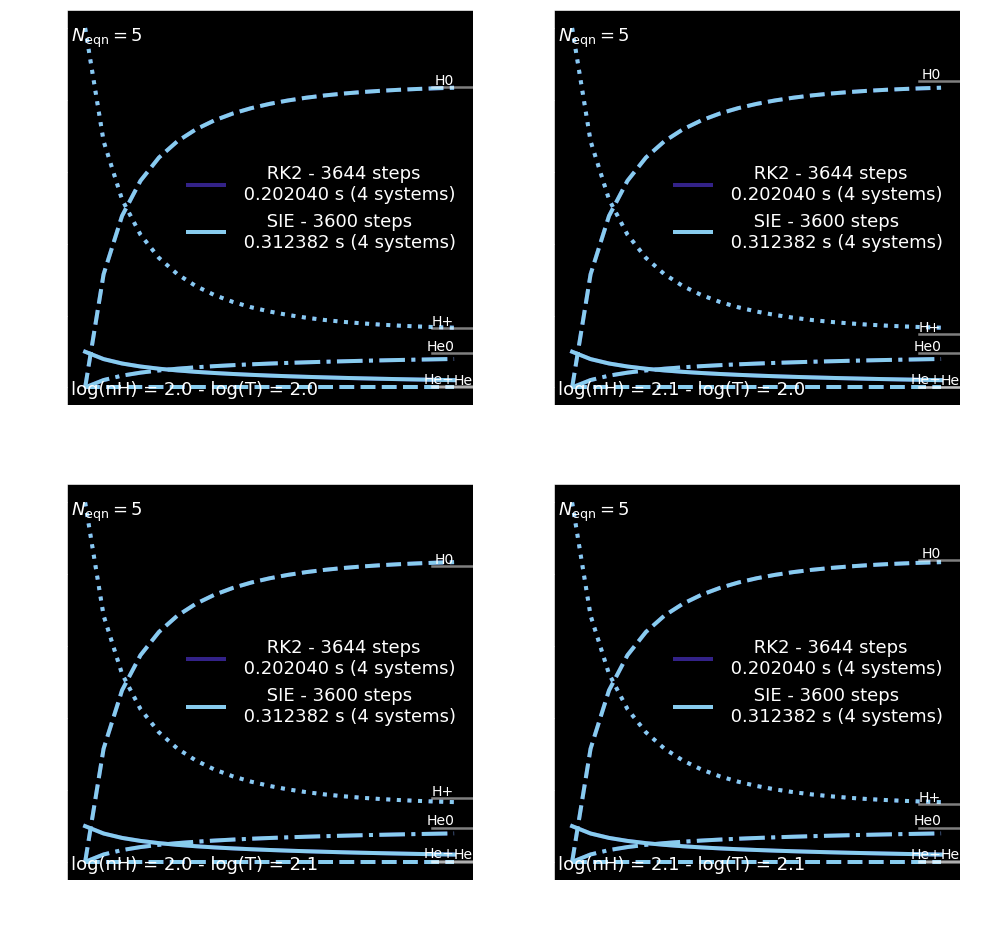

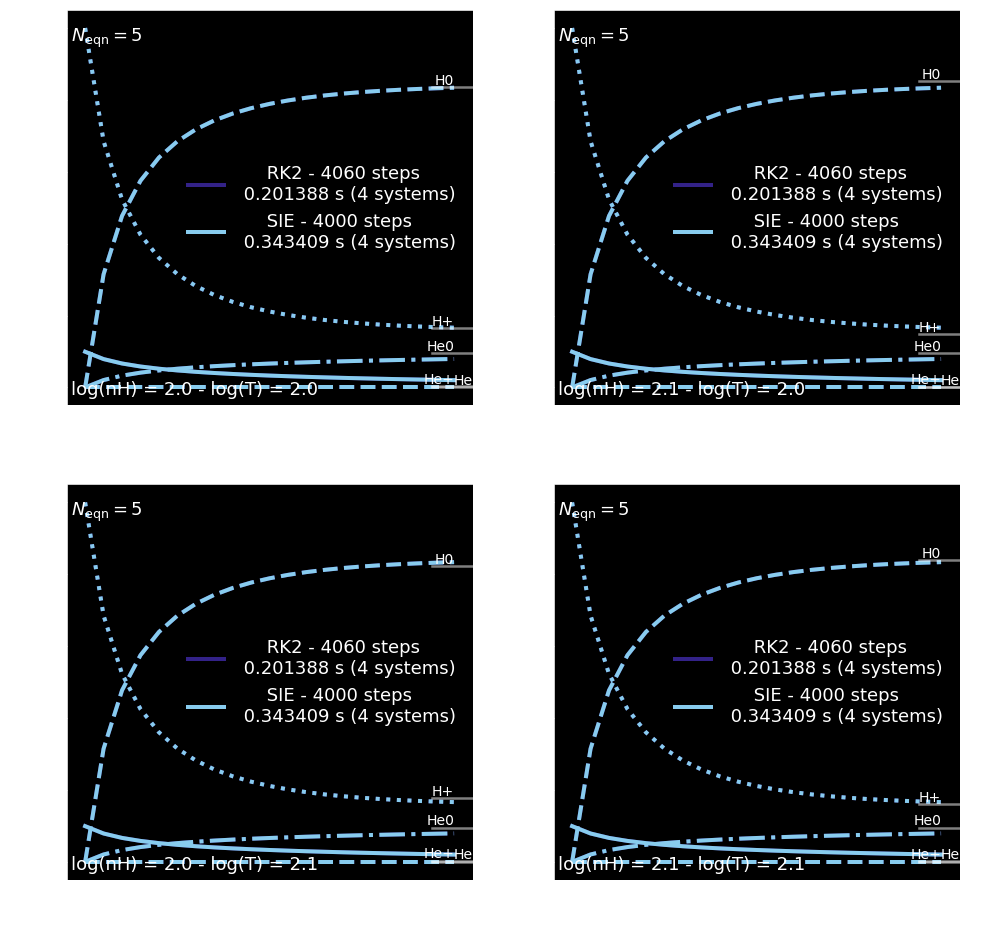

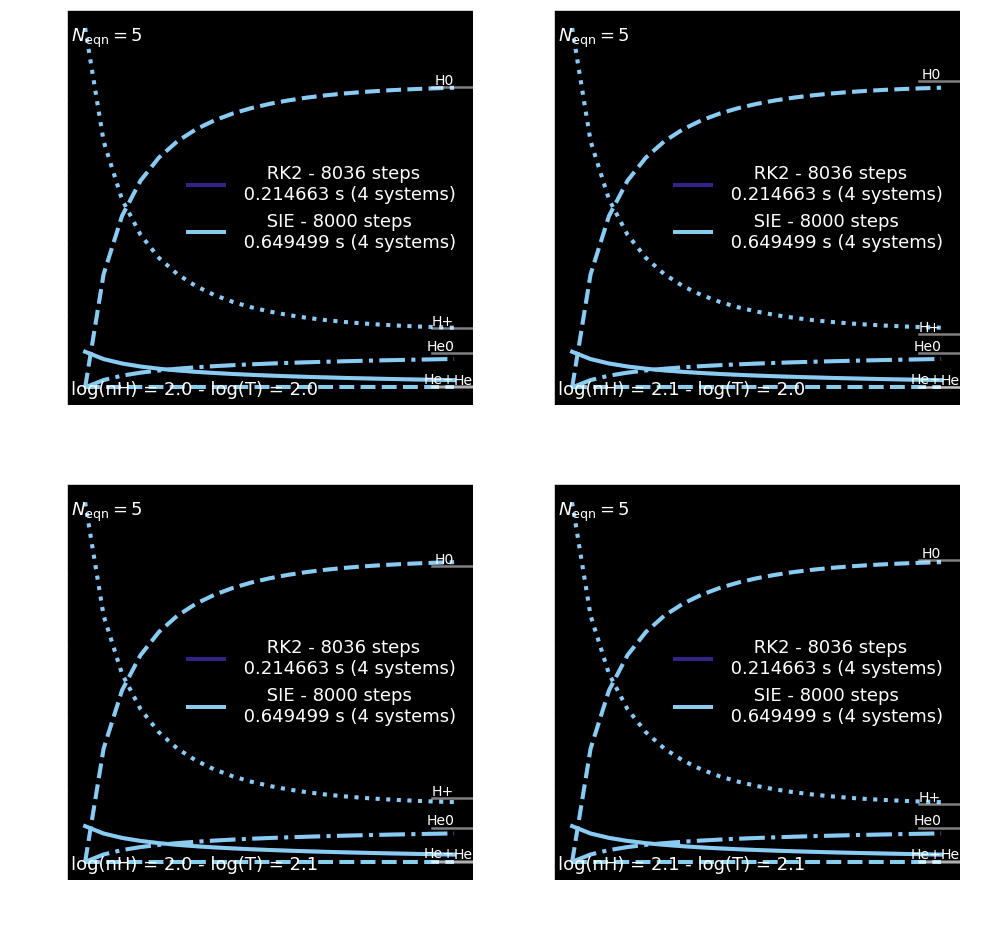

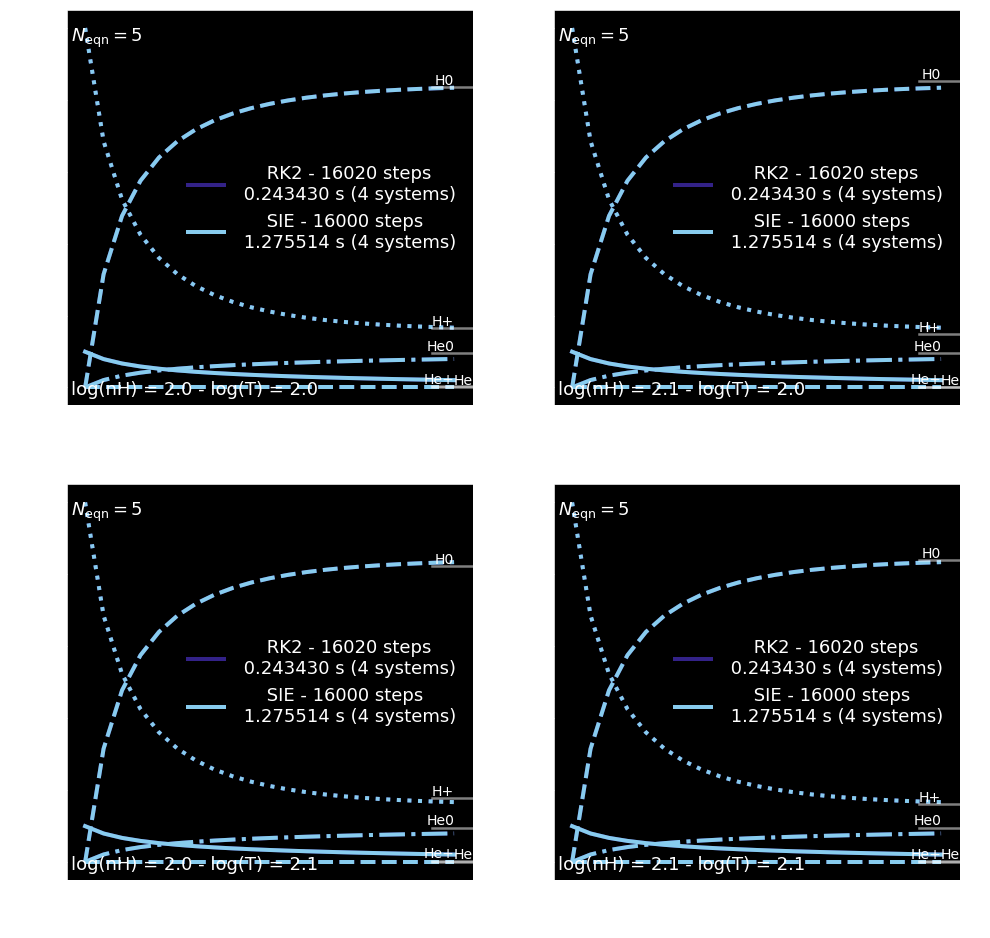

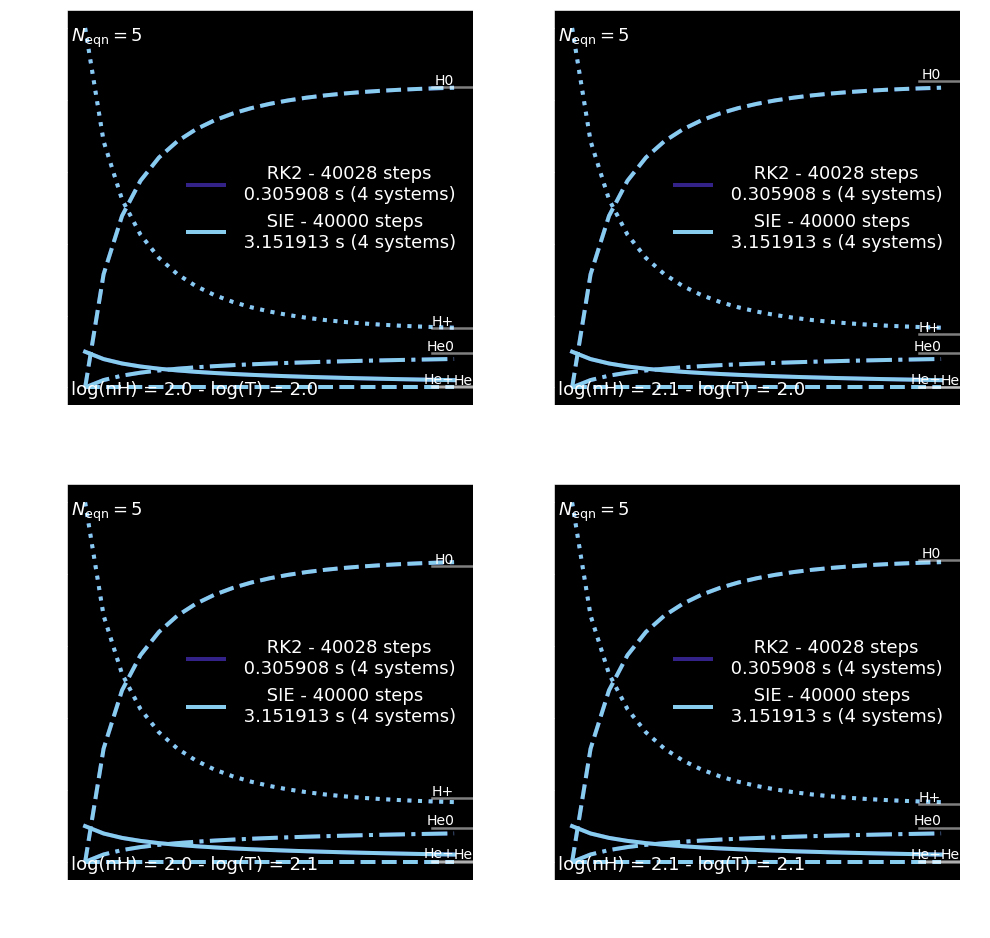

In [176]:
for frame_num,ode_cache in enumerate(multi_odes.ode_caches):
    fig,axs = ode_cache.plot_all_systems(
    xname = r'$t_\mathrm{ode}$ (yrs)',
    yname = r'$n_\mathrm{X}/n_\mathrm{H}$',
    supertitle = r"$N_\mathrm{eqn}=%d$"%ode_cache.Nequations_per_system,
    plot_eqm=True,
    loc=5)
    axs = np.array(axs)
    for ax in axs[1::2]:
        ax.set_yticklabels([])
    if savefig:
        fig.savefig(
            "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
            facecolor='k')
if savefig:
    frame_num+=1
    fig.savefig(
        "%s_system_grid_frame_%02d.png"%(multi_odes.system_name,frame_num),
        facecolor='k')
    frame_num+=1
    fig.savefig(
        "%s_system_grid_frame_fixed_%02d.png"%(multi_odes.system_name,frame_num),
        facecolor='k')

print()

In [44]:
multi_odes[-4].timess['SIE']

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

## Plot Memory Usage vs. Time

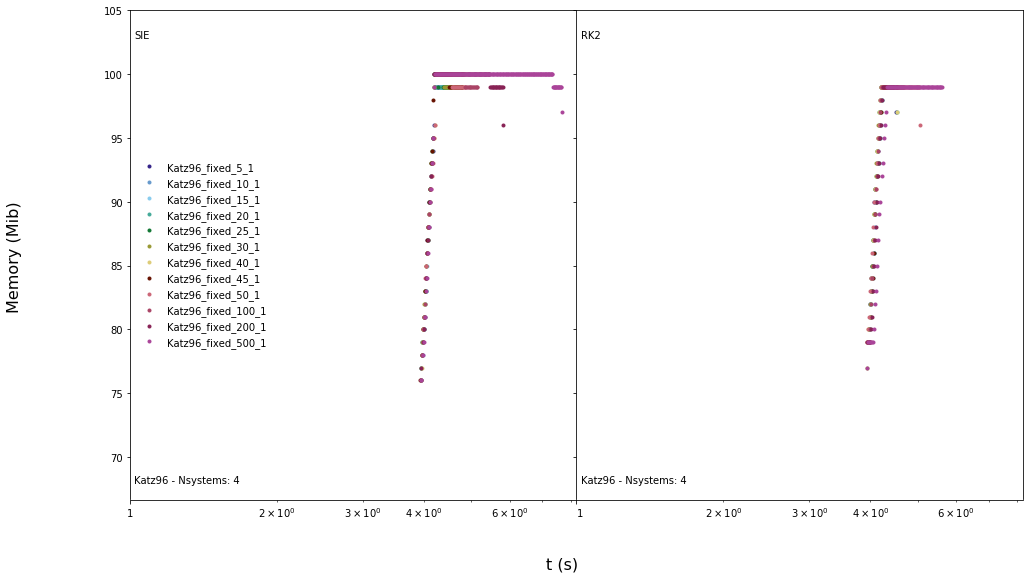

In [47]:
fig,axs = plt.subplots(ncols=2,nrows=1,sharex=True,sharey=True)
axs = axs.flatten()
for ax_i,(ax,solver) in enumerate(zip(axs,['SIE','RK2'])):
    for ode_i,ode_cache in enumerate(multi_odes.ode_caches):
        try:
            xs,ys = ode_cache.memory_times[solver],ode_cache.memory_usages[solver]

        except:
            continue
        
        neqn = ode_cache.Nequations_per_system
        label = neqn
        label = ode_cache.name
        ax.plot(xs,ys,'.',c=ode_cache.color,label=label)
        
    ylow = max(multi_odes[0].memory_usages['SIE']/1.5)
    nameAxes(
        ax,None,'t (s)', 'memory (Mib)',
        logflag=(1,0),ylow=ylow,xlow=1,
        supertitle=solver,
        subtitle="%s - Nsystems: %d"%(
            multi_odes.system_name,
            ode_cache.Nsystems),
        slackify=True,
        make_legend=not ax_i,loc=5)
    
bufferAxesLabels(axs,1,2,
    ylabels=True,share_ylabel='Memory (Mib)',
    xlabels=True,share_xlabel='t (s)',
    label_offset=0.025)
plt.subplots_adjust(hspace=0,wspace=0)
fig.set_size_inches(16,9)

if savefig:
    fig.savefig('%s_memory_vs_time.pdf'%multi_odes.system_name,facecolor='k')

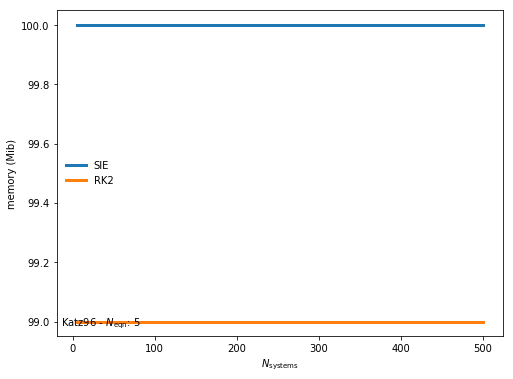

In [16]:
fig,ax = plot_something_vs_ntile(multi_odes,
    lambda ode_cache,solver:np.max(ode_cache.memory_usages[solver]),
    xs=multi_odes.fixed_steps)


nameAxes(
        ax,None,'$N_\mathrm{systems}$', 'memory (Mib)',
        logflag=(0,0),
        subtitle="%s - $N_\mathrm{eqn}$: %d"%(
            multi_odes.system_name,
            multi_odes[0].Nequations_per_system),
        slackify=True,
        make_legend=1,
        loc=6)

fig.set_size_inches(8,6)
if savefig:
    fig.savefig("%s_peak_memory_vs_neqn"%multi_odes.system_name,facecolor='k')